In [1]:
from skimage.data import cells3d
from bia_bob import bob
bob.__version__

'0.4.0'

In [2]:
bob.initialize(model="gpt-4-vision-preview")

In [3]:
data = cells3d()
image1 = data[30,0]
image2 = data[30,1]

In [4]:
%bob show the image `image1` and `image2` using matplotlib in one figure side-by-side.

To display the images `image1` and `image2` side-by-side in a single figure using `matplotlib`, I will perform the following steps:

1. Import the `matplotlib.pyplot` module for plotting the images.
2. Create a new figure using `plt.figure()`.
3. Add a subplot for `image1` using `plt.subplot()` and use `plt.imshow()` to display the image in this subplot.
4. Add another subplot for `image2` next to the first subplot and use `plt.imshow()` to display the second image.
5. Use `plt.show()` to render the figure and see the images side-by-side.

Now, let's execute this plan in code.

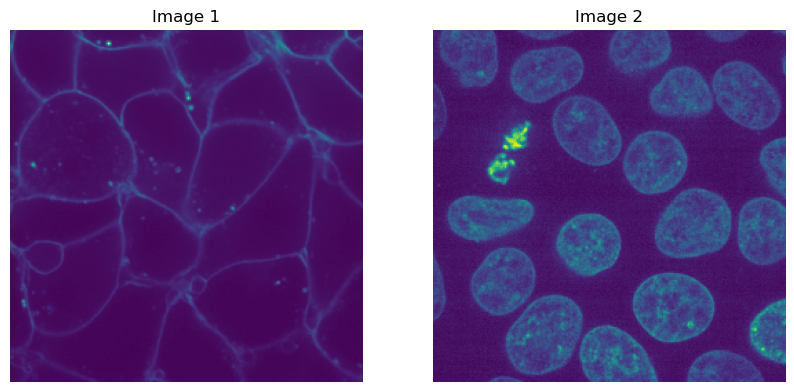

In [5]:
import matplotlib.pyplot as plt

# Creating a new figure
plt.figure(figsize=(10, 5))

# Adding the first subplot to display image1
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Image 1')
plt.axis('off')  # To turn off axis labels and ticks

# Adding the second subplot to display image2
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Image 2')
plt.axis('off')  # To turn off axis labels and ticks

# Displaying the images side-by-side
plt.show()

In [7]:
%%bob image1
What is in this image? Also propose an algorithm to segment the cells in the image.

The image appears to show a fluorescence microscopy image of cells, where the cell membranes or outlines are highlighted. It looks like the image is obtained from a tissue sample or a cell culture where individual cells can be seen as separate entities and they are visible due to the fluorescent dye that is likely binding to the cell membranes.

To segment the cells in this image, we can follow a standard bioimage analysis pipeline, which might include the following steps:

1. Preprocessing: Apply preprocessing techniques to improve the contrast of the image, such as histogram equalization or adaptive contrast enhancement, if necessary.
2. Noise Reduction: Use a denoising filter to reduce the noise in the image while preserving the edges. A median filter, Gaussian filter, or more advanced denoising methods such as non-local means could be considered.
3. Enhancement: Use edge enhancement techniques to highlight cell boundaries.
4. Thresholding: Apply a thresholding method to convert the image to binary, where the cell membranes are separated from the background.
5. Morphological Operations: Perform morphological operations like opening or closing to refine the cell boundaries and to separate touching cells.
6. Connected Components or Watershed: Apply a connected component analysis or watershed algorithm for individual cell segmentation.
7. Post-processing: Clear border touching cells, remove small objects that are likely to be noise, and fill holes within the cells if necessary.

Let's write some Python code using the `scikit-image` library to perform this segmentation task. Since I cannot execute or test the code, the following is a general guideline and may require adjustments for optimal results for this specific image.

C:\Users\haase\AppData\Local\Temp\ipykernel_15508\645362405.py:9: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  image1_preprocessed = filters.rank.equalize(image1_preprocessed, selem=morphology.disk(30))
C:\Users\haase\AppData\Local\Temp\ipykernel_15508\645362405.py:12: FutureWarning: `selem` is a deprecated argument name for `median`. It will be removed in version 1.0. Please use `footprint` instead.
  image1_denoised = filters.median(image1_preprocessed, selem=morphology.disk(3))
C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\skimage\_shared\utils.py:157: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  return func(*args, **kwargs)


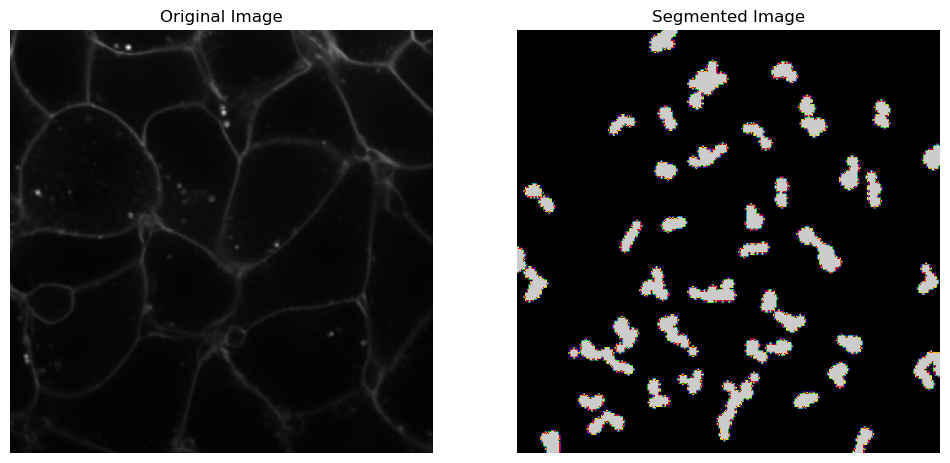

In [10]:
from skimage import filters, morphology, measure, segmentation
from scipy import ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing and denoising (if necessary)
# Since scikit-image's rank filters can handle only integer images, we ensure the image is in 'uint8' format
image1_preprocessed = image1 if image1.dtype == np.uint8 else (image1 * 255).astype(np.uint8)
image1_preprocessed = filters.rank.equalize(image1_preprocessed, selem=morphology.disk(30))

# Noise reduction with a median filter
image1_denoised = filters.median(image1_preprocessed, selem=morphology.disk(3))

# Thresholding to get a binary mask using Otsu's method
thresh = filters.threshold_otsu(image1_denoised)
image1_binary = image1_denoised > thresh

# Morphological operations to refine the cell boundaries
image1_morph = morphology.opening(image1_binary, morphology.disk(3))

# Segmentation using the watershed algorithm
distance_map = ndi.distance_transform_edt(image1_morph)
markers = measure.label(image1_morph)
image1_labels = segmentation.watershed(-distance_map, markers, mask=image1_morph)

# Post-processing to remove small objects and fill holes
image1_labels = morphology.remove_small_objects(image1_labels, min_size=100)
image1_labels = morphology.remove_small_holes(image1_labels, area_threshold=100)

# Show the original and segmented image side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image1, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(image1_labels, cmap='nipy_spectral')
ax[1].set_title('Segmented Image')
ax[1].axis('off')
plt.show()

In [11]:
%%bob image2
What is in this image? Also propose an algorithm to segment the cells in the image.

The image appears to be a grayscale fluorescence microscopy image, showing a field of cells with clearly visible nuclei. The nuclei are the bright circular structures against the darker background. This kind of image is typical for cell biology research where the objective might be to count cells, analyze the size and shape of nuclei, or measure the intensity of fluorescence.

To segment the nuclei in this image, the following steps can be taken:

1. Preprocessing: If the image exhibits uneven illumination or background, use preprocessing methods to correct for this, possibly employing a top-hat filter.
2. Noise Reduction: Apply a denoising filter, such as a Gaussian blur or median filter, to reduce image noise that could interfere with segmentation.
3. Thresholding: Use an adaptive or global thresholding method to distinguish nuclei from the background. Otsu's method is often a good starting point for global thresholding.
4. Binary Cleanup: Perform binary morphological operations, such as opening to remove small artifacts or closing to bridge gaps within objects.
5. Connected Component Analysis or Watershed: To separate individual nuclei, apply a connected component analysis to label each distinct nucleus. If nuclei are clumped together, a technique such as watershed segmentation could be used.
6. Post-processing: Exclude artifacts based on size or shape criteria by measuring properties of labeled regions and filtering out those that do not meet the criteria for nuclei.

Let's write Python code using `scikit-image` to perform this task. Since I cannot see the results of the execution, the pipeline might need to be adjusted for optimal performance on the actual image.

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\skimage\_shared\utils.py:274: FutureWarning: `selem` is a deprecated argument name for `opening`. It will be removed in version 1.0. Please use `footprint` instead.
  warnings.warn(self.warning_msg.format(


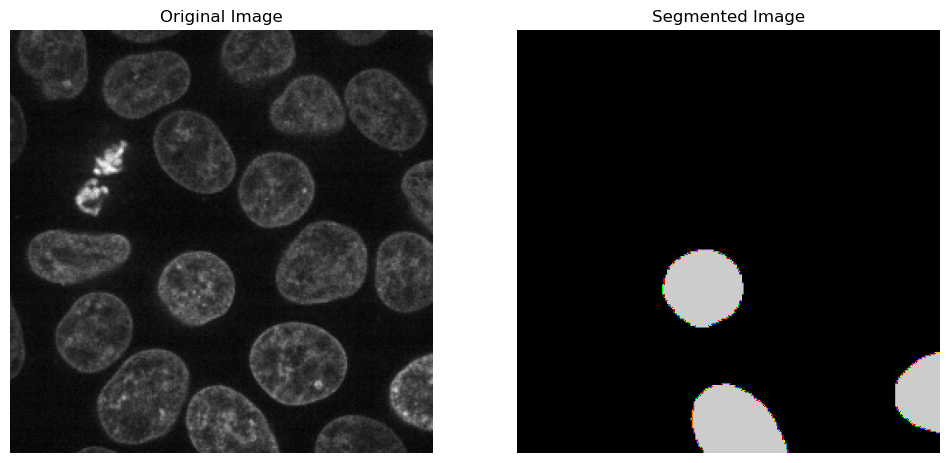

In [12]:
from skimage import filters, morphology, measure, segmentation, util, exposure
from scipy import ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing (Image contrast might be good and may not require preprocessing)
# If needed, this is how you might apply a top-hat filter for background correction:
# selem = morphology.disk(15)
# image2_preprocessed = image2 - morphology.white_tophat(image2, selem)

# Noise reduction with a Gaussian filter
image2_denoised = filters.gaussian(image2, sigma=1)

# Thresholding to get a binary mask using Otsu's method
thresh = filters.threshold_otsu(image2_denoised)
image2_binary = image2_denoised > thresh

# Binary cleanup through morphological operations
image2_cleaned = morphology.opening(image2_binary, selem=morphology.disk(2))

# Segmentation using the connected component analysis or watershed
labels = measure.label(image2_cleaned)
if np.max(labels) > 1:  # If more than one object is detected, Watershed might not be needed
    distance_map = ndi.distance_transform_edt(image2_cleaned)
    markers = measure.label(distance_map > 0.8 * np.max(distance_map))
    labels = segmentation.watershed(-distance_map, markers, mask=image2_cleaned)

# Post-processing to remove artifacts based on size or shape
labels = morphology.remove_small_objects(labels, min_size=20)
labels = morphology.remove_small_holes(labels, area_threshold=20)

# Show the original and segmented image side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image2, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(labels, cmap='nipy_spectral')
ax[1].set_title('Segmented Image')
ax[1].axis('off')
plt.show()